In [278]:
import pandas, numpy

# Initializes data
data = pandas.read_csv('clint.csv').drop('Unnamed: 0', 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [279]:
# Cleans message data into a bag of words
messages = data.message.str.lower()
for p in ".,!?:;\"'-~|[]()/\\\n":
    messages = messages.str.replace(p,' ')
messages = messages.str.split()
data['words'] = messages.apply(lambda x: [w for w in x if w.isalpha() and w not in stop])
data['len'] = data.words.apply(len)
print('Number of messages: ' + str(len(data)))
print('Maximum number of words: ' + str(data.len.max()))
print('Minimum number of words: ' + str(data.len.min()))
print('Average number of words: ' + str(data.len.mean()))
print('Fewest words message: ' + data.message.loc[data.len.argmin()])
print('Most words message: ' + data.message.loc[data.len.argmax()])

Number of messages: 12461
Maximum number of words: 84
Minimum number of words: 0
Average number of words: 3.3850413289463126
Fewest words message: We ?
Most words message: TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R TriHard C A N C E R


In [280]:
# Sentiment Analysis
pos = open('positive.txt').read().splitlines()
neg = open('negative.txt').read().splitlines()

data['pos'] = [len([w for w in t if w in pos]) for t in data.words]
data['neg'] = [len([w for w in t if w in neg]) for t in data.words]
data['comb'] = data.pos - data.neg

In [281]:
import datetime
data['minute'] = [datetime.datetime.fromtimestamp(x/1000.).strftime('%m/%d %H:%M') for x in data.timestamp]

04/17 02:24
pos     0.571429
neg     0.142857
comb    0.428571
Name: 04/17 02:24, dtype: float64
04/17 02:38
pos     0.314815
neg     0.740741
comb   -0.425926
Name: 04/17 02:38, dtype: float64


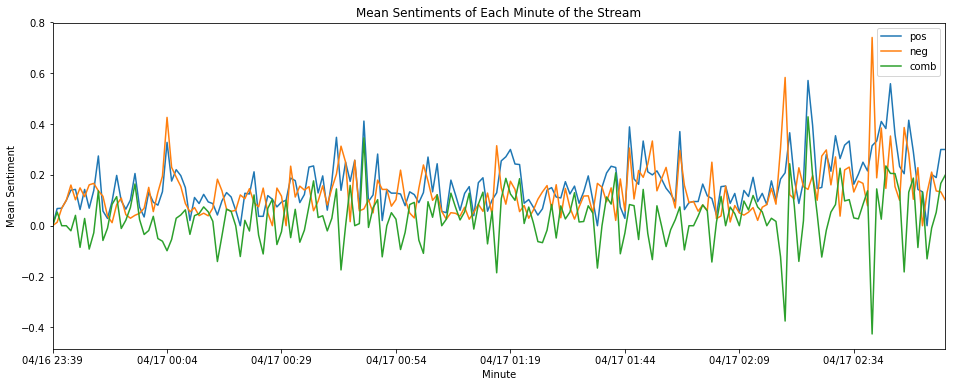

In [282]:
# Time series visualization of sentiment analysis
g = data.groupby('minute')
gt = g.mean().loc[:,['pos','neg','comb']]

print(gt.comb.argmax())
print(gt.loc[gt.comb.argmax()])

print(gt.comb.argmin())
print(gt.loc[gt.comb.argmin()])

%matplotlib inline
ax = gt.plot()
ax.set_title('Mean Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [283]:
# The most positive minutes
gt[gt.comb > 0.3]

,pos,neg,comb
minute,,,
04/17 00:47,0.411765,0.066176,0.345588
04/17 02:24,0.571429,0.142857,0.428571


In [284]:
# The most negative minutes
gt[gt.comb < -0.3]

,pos,neg,comb
minute,,,
04/17 02:19,0.208333,0.583333,-0.375000
04/17 02:38,0.314815,0.740741,-0.425926


In [285]:
# Sentiment Analysis on emotes
posemotes = open('positiveemotes.txt').read().splitlines()
negemotes = open('negativeemotes.txt').read().splitlines()

data['posemotes'] = [len([w for w in t if w in posemotes]) for t in data.words]
data['negemotes'] = [len([w for w in t if w in negemotes]) for t in data.words]
data['combemotes'] = data.posemotes - data.negemotes

04/16 23:39
posemotes     1.0
negemotes     0.0
combemotes    1.0
Name: 04/16 23:39, dtype: float64
04/17 00:46
posemotes     0.141667
negemotes     0.658333
combemotes   -0.516667
Name: 04/17 00:46, dtype: float64


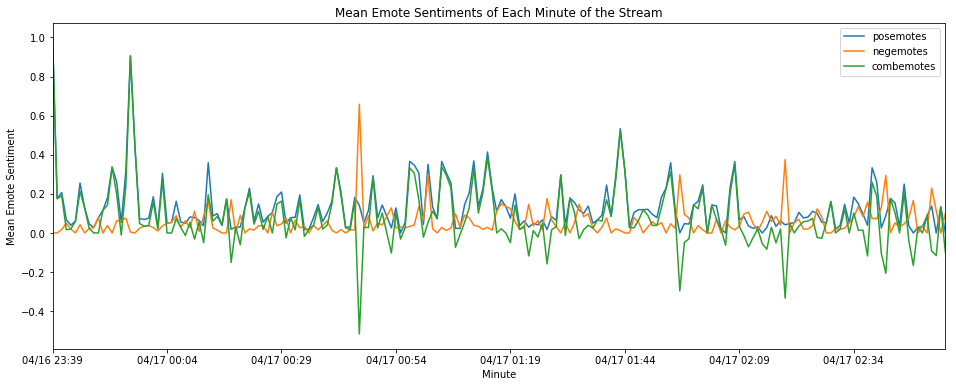

In [286]:
# Time series visualization of emote sentiment analysis
g = data.groupby('minute')
gtemotes = g.mean().loc[:,['posemotes','negemotes','combemotes']]

print(gtemotes.combemotes.argmax())
print(gtemotes.loc[gtemotes.combemotes.argmax()])

print(gtemotes.combemotes.argmin())
print(gtemotes.loc[gtemotes.combemotes.argmin()])

ax = gtemotes.plot()
ax.set_title('Mean Emote Sentiments of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [287]:
# The most positive minutes
gtemotes[gtemotes.combemotes > 0.3]

,posemotes,negemotes,combemotes
minute,,,
04/16 23:39,1.000000,0.000000,1.000000
04/16 23:52,0.337349,0.000000,0.337349
04/16 23:56,0.907173,0.004219,0.902954
04/16 23:57,0.438356,0.000000,0.438356
04/17 00:41,0.333333,0.000000,0.333333
04/17 00:57,0.366667,0.033333,0.333333
04/17 00:58,0.346939,0.040816,0.306122
04/17 01:04,0.366197,0.028169,0.338028
04/17 01:11,0.368421,0.039474,0.328947


In [288]:
# The most negative minutes
gtemotes[gtemotes.combemotes < -0.3]

,posemotes,negemotes,combemotes
minute,,,
04/17 00:46,0.141667,0.658333,-0.516667
04/17 02:19,0.041667,0.375000,-0.333333


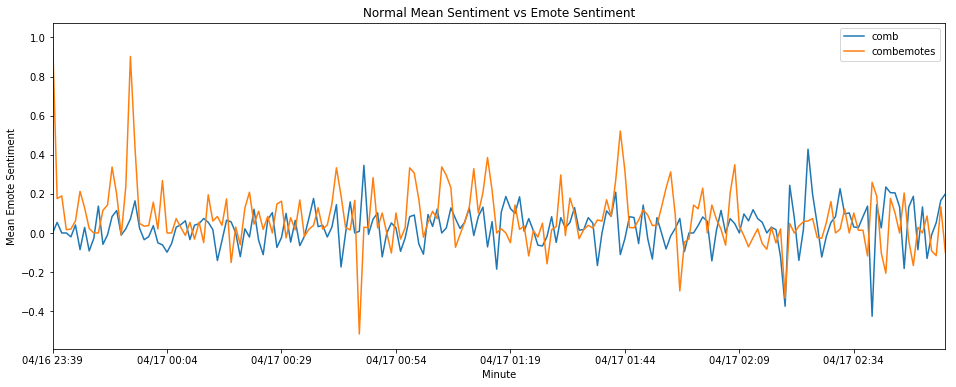

In [289]:
# Plot of normal lexicon sentiment analysis and emote analysis
gtt = pandas.concat([gt.loc[:,['comb']], gtemotes.loc[:,['combemotes']]], axis=1)
ax = gtt.plot()

ax.set_title('Normal Mean Sentiment vs Emote Sentiment')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Emote Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)

In [290]:
# Computes Pearson correlation between sentiment analysis and emote analysis
combmean = gtt.comb.mean()
combemotesmean = gtt.combemotes.mean()
r = sum((gtt.comb - combmean) * (gtt.combemotes - combemotesmean))/(numpy.sqrt(sum((gtt.comb - combmean)**2)) * numpy.sqrt(sum((gtt.combemotes - combemotesmean)**2)))
r

-0.016678942946537524

In [291]:
subsonly = data[data.subscriber]

04/17 02:24
pos     1.00
neg     0.05
comb    0.95
Name: 04/17 02:24, dtype: float64
04/17 02:38
pos     0.142857
neg     1.000000
comb   -0.857143
Name: 04/17 02:38, dtype: float64


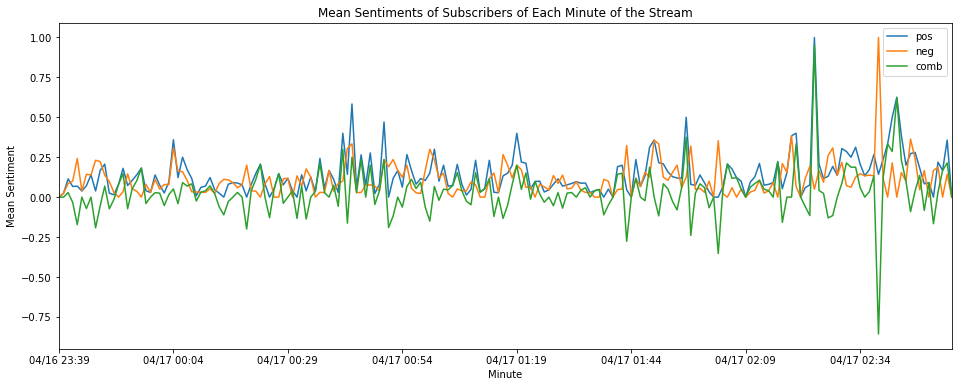

In [292]:
# Time series visualization of sentiment analysis on subscribers
gsubs = subsonly.groupby('minute')
gtsubs = gsubs.mean().loc[:,['pos','neg','comb']]

print(gtsubs.comb.argmax())
print(gtsubs.loc[gtsubs.comb.argmax()])

print(gtsubs.comb.argmin())
print(gtsubs.loc[gtsubs.comb.argmin()])

%matplotlib inline
ax = gtsubs.plot()
ax.set_title('Mean Sentiments of Subscribers of Each Minute of the Stream')
ax.set_xlabel('Minute')
ax.set_ylabel('Mean Sentiment')
ax.figure.set_size_inches(16, 6, forward=True)